# Compute singer notes

A singer didgeridoo needs 2 properties: 1) A resonant peak in the impedance spektrum at the frequency of the singer note. And 2) a maximum or minimum of the soundwave at the end of the bore at the singer note frequency. This skript computes 2).

The chart shows the sound wave at 

In [1]:
import sys
sys.path.append('../')
from cad.calc.conv import note_to_freq, note_name, freq_to_note_and_cent, freq_to_wavelength, note_name_to_number, freq_to_note
import matplotlib.pyplot as plt
import numpy as np

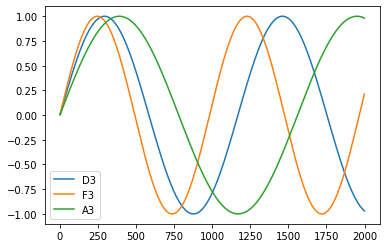

In [2]:
x=np.arange(1,2000)

def get_wave(x,f):
    l=freq_to_wavelength(f)
    return [np.sin(_x*2*np.pi/l) for _x in x]

notes = ["D3", "F3", "A3"]
freqs = [note_to_freq(note_name_to_number(x)) for x in notes]

for i in range(len(freqs)):
    plt.plot(x,get_wave(x,freqs[i]), label=notes[i])    
plt.legend(loc="lower left")


## Find a bore length that has many maxima in a scale


Notes: ['D1', 'D2', 'F2', 'G2', 'A3', 'B3', 'C3', 'D3', 'F3', 'G3', 'A4', 'A#4', 'C4', 'C#4', 'E4', 'F#4', 'A5', 'A#5', 'C5']
Frequencies: ['73.42', '146.83', '174.61', '196.00', '220.00', '246.94', '261.63', '293.66', '349.23', '392.00', '440.00', '493.88', '523.25', '587.33', '698.46', '783.99', '880.00', '987.77', '1046.50']
max bore length 1853
max amplitude 14.433855400965863


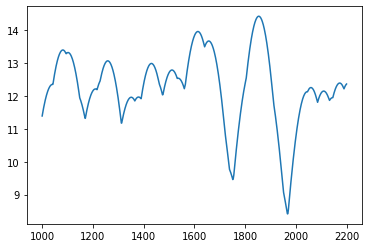

In [3]:
min_l = 1000
max_l = 2200

base_note=-31
scale = [0,3,5,7,9,10]

frequencies=[note_to_freq(base_note)]
for octave in [12,24,36]:
    for note in scale:
        note = note + base_note + octave
        frequencies.append(note_to_freq(note))

notes = [note_name(int(freq_to_note(x))) for x in frequencies]

print("Notes:", notes)
print("Frequencies:", [f"{x:.2f}" for x in frequencies])


amplitudes_x = np.arange(min_l, max_l)
amplitudes_y = np.zeros(len(amplitudes_x))
for freq in frequencies:
    amplitudes_y += np.abs(get_wave(amplitudes_x, freq))

max_i = np.argmax(amplitudes_y)
max_x = amplitudes_x[max_i]

print("max bore length", max_x)
print("max amplitude", amplitudes_y[max_i])
plt.plot(amplitudes_x, amplitudes_y)

In [7]:
# now find all notes whose maximum is not further away than 1/10 of the wavelength from max_x

close_notes = []
for i in range(len(notes)):
    wavelength=freq_to_wavelength(frequencies[i])
    for j in range(20):
        max_pos=(0.5*j+0.25) * wavelength
        if np.abs(max_pos-max_x) < 0.07*wavelength:
            close_notes.append(notes[i])

print(close_notes)


['D2', 'A3', 'E4', 'F#4', 'A5']


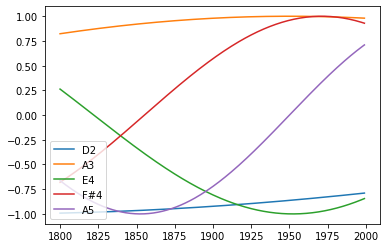

In [8]:
x=np.arange(1800, 2000)

def get_wave(x,f):
    l=freq_to_wavelength(f)
    return [np.sin(_x*2*np.pi/l) for _x in x]

freqs = [note_to_freq(note_name_to_number(x)) for x in close_notes]

for i in range(len(freqs)):
    plt.plot(x,get_wave(x,freqs[i]), label=close_notes[i])    
plt.legend(loc="lower left")
